# Conditioning and Stability

## Daniel Dimitrov

In [3]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import math as m

### Problem 1

In [4]:
A = np.array([[1, 1], [1, 1+1e-10]])

sigma = la.svdvals(A)

k = max(sigma) / min(sigma)
print('k = ',k)
k_verify = np.linalg.cond(A)
print('verify: ',k_verify)

# orthogonal matrix
O = np.array([[1, 0], [0, -1]])
k_O = np.linalg.cond(O)
print('k of orth. matrix: ',k_O)

# signular matrix
S = np.array([[1, 1], [1, 1]])
k_S = np.linalg.cond(S)
print('k of sing. matrix: ',k_S)


k =  39999991794.0589
verify:  39999991794.0589
k of orth. matrix:  1.0
k of sing. matrix:  5.961777047638983e+16


### Problem 2

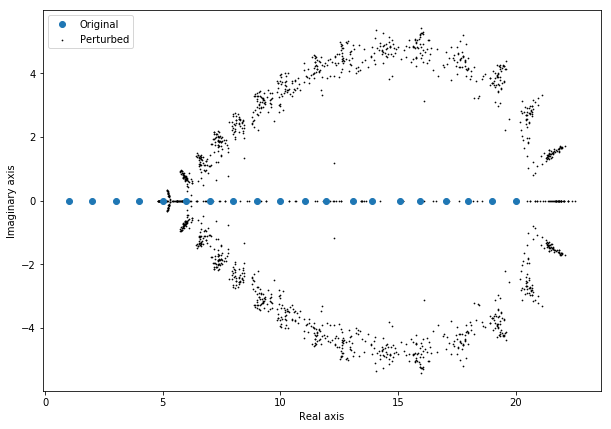

In [5]:
# Initialize
new_coeffs = np.zeros(21)
# Set up Wilkinson polynomial
w_roots = np.zeros(20)
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0] #set up symbolically the polynomial
w_coeffs = np.array(w.all_coeffs())  #carve out the coeff/s
w_roots = np.roots(np.poly1d(w_coeffs))

plt.figure(figsize=(10, 7))
plt.plot(w_roots, np.zeros(20), 'o', label='Original')
# Perturb each of the coefficients very slightly by a random error

for iE in range(100):
    r = np.random.normal(1,1e-10,21)
    new_coeffs = w_coeffs*r
    new_roots = np.roots(np.poly1d(new_coeffs))
    
    plt.scatter(new_roots.real, new_roots.imag, marker='.', c='k', s=2)

plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.legend(['Original', 'Perturbed'], loc='upper left')
plt.show()

### Problem 3

In [8]:
def perturb(A):
    # set up the perturbation
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags

    lmbda = la.eigvals(A)
    lmbda_hat = la.eigvals(A + H)
    k_hat = la.norm(lmbda - lmbda_hat) / la.norm(H)
    k = (la.norm(A)/la.norm(lmbda)) * k_hat

    return k_hat, k


In [10]:
# the matrix
A = np.array([[1, 1], [1, 1+1e-10]])
k_hat, k = perturb(A)
print('absolute: ',k)
print('relative: ',k_hat)

absolute:  0.8032316669503261
relative:  0.8032316669503261


### Problem 4

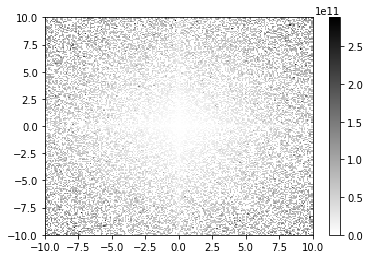

In [12]:
x_min, x_max, y_min, y_max = -10, 10, -10, 10
res = 200

k = np.zeros([res,res])

x_grid = np.linspace(x_min, x_max, res)
y_grid = np.linspace(y_min, y_max, res) 

for iX, x_i in enumerate(x_grid):
    for iY, y_i in enumerate(y_grid):
        A = np.array([[1, x_i], [y_i, 1]])
        k_hat, k[iX,iY] = perturb(A)

x, y = np.meshgrid(x_grid,y_grid)        
plt.pcolormesh(x, y, k, cmap='gray_r')
plt.colorbar()
plt.show()

### Problem 5

The Inverse method has a forward error of 19.37
The QR method has a forward error of 4.53


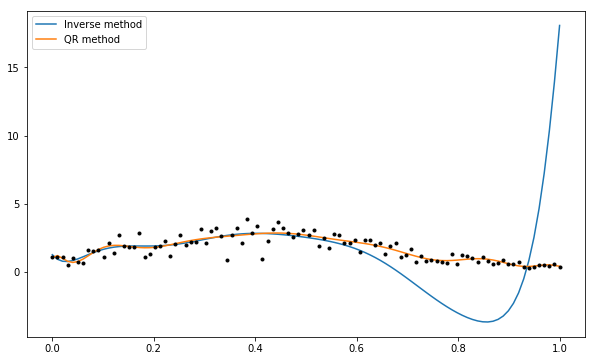

In [44]:
# fit a polynomial of degree n

n = 15
# initialize coeff vectors 
coefs_qr, coefs_inv = np.zeros(n+1), np.zeros(n+1)
# load data
xk, yk = np.load('stability_data.npy').T

# Solve by matrix inversion
b = yk.T.copy()
A = np.vander(xk, n+1)
coefs_inv = la.inv(A.T@ A)@ A.T@ b
error_inv = la.norm(A @ coefs_qr - yk)
print(f'Inverse method forward error of {error_inv:.2f}')

# Solve by QR decomposition 
Q, R = la.qr(A, mode='economic')
coefs_qr = la.solve_triangular(R, Q.T@y)
error_qr = la.norm(A @ coefs_qr - yk)
print(f'QR method forward error of {error_qr:.2f}')

# Plot and see how bad the Inv. method is
plt.figure(figsize=(10, 6))
plt.plot(xk, np.polyval(coefs_inv, xk), label='Inverse method')
plt.plot(xk, np.polyval(coefs_qr, xk), label='QR method')
plt.plot(xk, yk, '.', c='k')
plt.legend()
plt.show()

### Problem 6

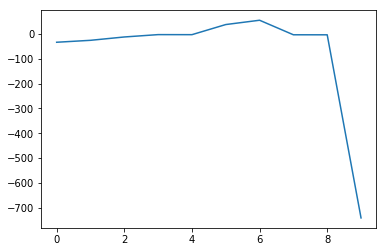

In [55]:
x = sy.symbols('x')
n_list = np.arange(5, 50, 5)
    
errors = np.empty(10)
    
for i, n in enumerate(n_list):
    I_n_symb = (-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n) / m.e    
    integral = sy.N(sy.integrate(x**n * sy.exp(x-1), (x, 0, 1)))
    errors[i] = np.abs(integral - I_n_symb)
        
plt.plot(np.log(errors))
plt.show()